# Plotting EZ and EX values

In [1]:
from tkinter import filedialog
from os import getcwd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_read = r'Output\LogData_EZEX-List.csv'

df = pd.read_csv(filepath_or_buffer=file_path_read)
del df["Unnamed: 6"]
df["DATE TIME"] = pd.to_datetime(df["DATE"] + ' ' + df["TIME"])
df.head()

,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
0,16APR24,16:47:29.9,Track 3,101,98,82.0,2024-04-16 16:47:29.900
1,16APR24,16:47:43.9,Track 1,98,98,48.0,2024-04-16 16:47:43.900
2,16APR24,16:47:52.2,Track 1,101,97,19.0,2024-04-16 16:47:52.200
3,16APR24,16:48:34.2,Track 3,98,99,8.0,2024-04-16 16:48:34.200
4,16APR24,16:48:34.9,Track 1,98,98,73.0,2024-04-16 16:48:34.900


In [3]:
# get list of unique dates
dates_list = df["DATE"].unique()
dates_list

array(['16APR24', '17APR24'], dtype=object)

## Case 1

In [4]:
df_data = df[df["DATE"] == dates_list[0]]
df_data

,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
0,16APR24,16:47:29.9,Track 3,101,98,82.0,2024-04-16 16:47:29.900
1,16APR24,16:47:43.9,Track 1,98,98,48.0,2024-04-16 16:47:43.900
2,16APR24,16:47:52.2,Track 1,101,97,19.0,2024-04-16 16:47:52.200
3,16APR24,16:48:34.2,Track 3,98,99,8.0,2024-04-16 16:48:34.200
4,16APR24,16:48:34.9,Track 1,98,98,73.0,2024-04-16 16:48:34.900
...,...,...,...,...,...,...,...
2268,16APR24,23:59:42.6,Track 4,73,102,32.0,2024-04-16 23:59:42.600
2269,16APR24,23:59:48.1,Track 4,76,102,32.0,2024-04-16 23:59:48.100
2270,16APR24,23:59:52.9,Track 4,79,102,34.0,2024-04-16 23:59:52.900
2271,16APR24,23:59:58.2,Track 1,99,98,30.0,2024-04-16 23:59:58.200


In [5]:
df_data = df_data.reset_index()
df_data

,index,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
0,0,16APR24,16:47:29.9,Track 3,101,98,82.0,2024-04-16 16:47:29.900
1,1,16APR24,16:47:43.9,Track 1,98,98,48.0,2024-04-16 16:47:43.900
2,2,16APR24,16:47:52.2,Track 1,101,97,19.0,2024-04-16 16:47:52.200
3,3,16APR24,16:48:34.2,Track 3,98,99,8.0,2024-04-16 16:48:34.200
4,4,16APR24,16:48:34.9,Track 1,98,98,73.0,2024-04-16 16:48:34.900
...,...,...,...,...,...,...,...,...
2268,2268,16APR24,23:59:42.6,Track 4,73,102,32.0,2024-04-16 23:59:42.600
2269,2269,16APR24,23:59:48.1,Track 4,76,102,32.0,2024-04-16 23:59:48.100
2270,2270,16APR24,23:59:52.9,Track 4,79,102,34.0,2024-04-16 23:59:52.900
2271,2271,16APR24,23:59:58.2,Track 1,99,98,30.0,2024-04-16 23:59:58.200


### Plotting

In [77]:
def plotApproachGraph(df_plot: pd.DataFrame, exclude_Speed: bool=False):
    sns.set_theme(style="ticks")
    colors = sns.color_palette(palette='viridis', n_colors=2)

    fig, ax1 = plt.subplots(figsize=(20, 6))
    ax1.grid(True)

    sns.lineplot(
        data=df_plot,
        x="DATE TIME",
        y="EZ",
        color=colors[0],
        # palette="flare",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        marker="o",
        label="EZ value",
        ax=ax1,
        legend=False,
    )

    if (exclude_Speed == False):
        ax2 = ax1.twinx()
        sns.lineplot(
            data=df_plot,
            x="DATE TIME",
            y="SPEED (mph)",
            color=colors[1],
            alpha=0.35,
            # palette="viridis",
            # hue="TRACK NUM",
            # style="TRACK NUM",
            marker="o",
            linestyle='--',
            label="Speed",
            ax=ax2,
            legend=False,
        )

        # Fix the legend (since we're using two axes)
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
    
    else:
        lines1, labels1 = ax1.get_legend_handles_labels()
        ax1.legend(lines1, labels1, loc='lower left')

    # plt.legend()
    plt.title("Approach Graph", fontsize=22)
    plt.show()


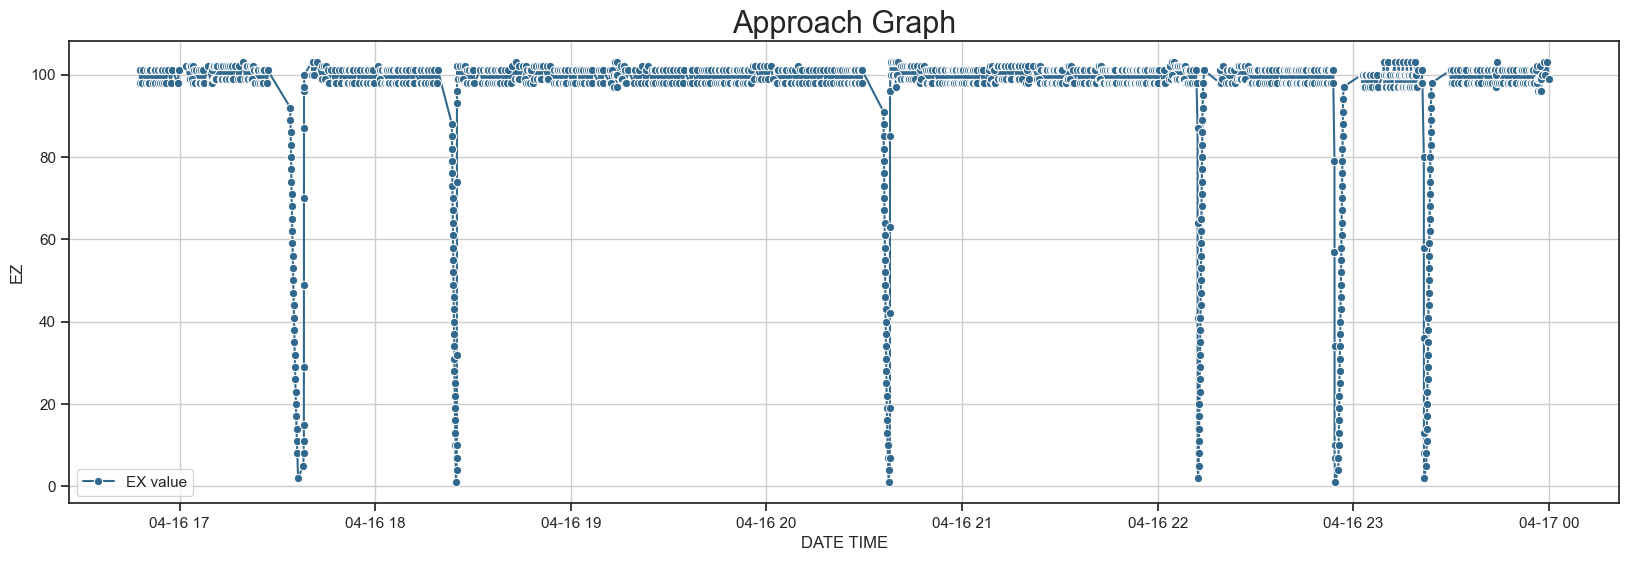

In [78]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]

plotApproachGraph(df_plot, exclude_Speed=True)

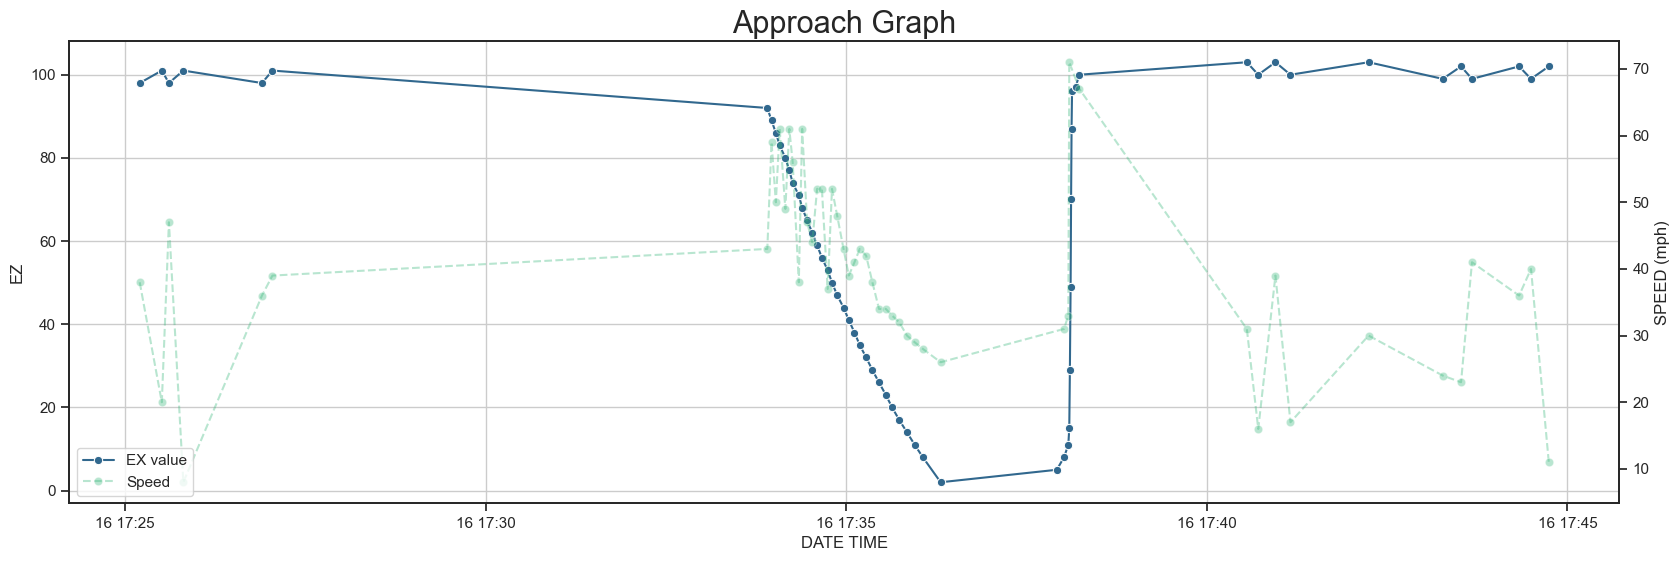

In [74]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]

plotApproachGraph(df_plot)


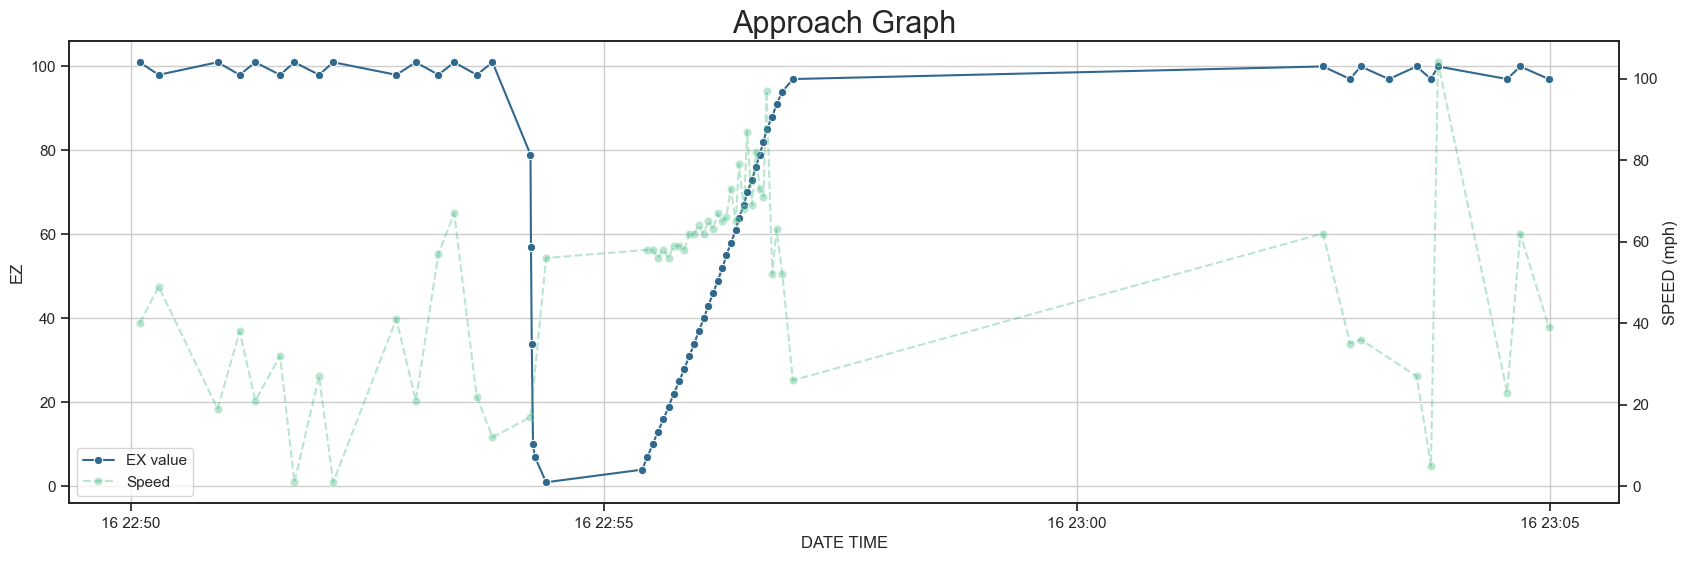

In [75]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 22:50:0")]
df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 23:05:0")]

plotApproachGraph(df_plot)

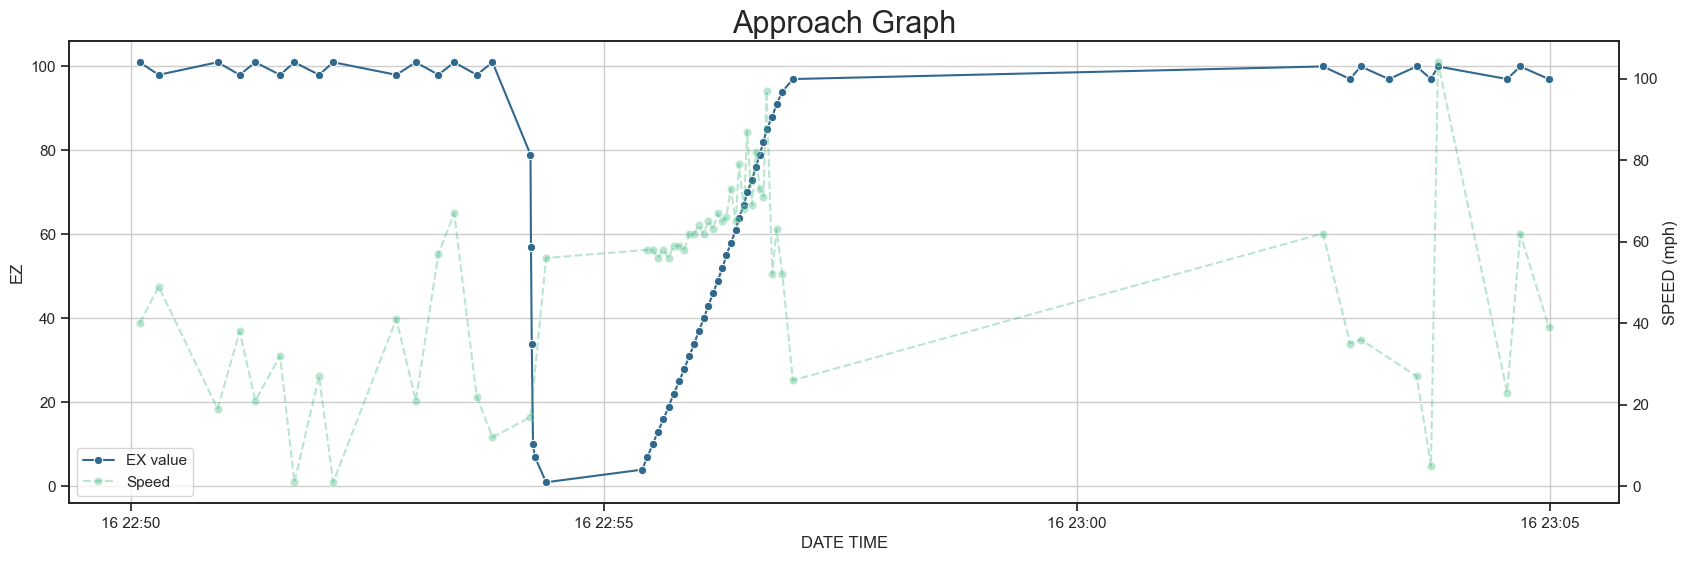

In [76]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 22:50:0")]
df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 23:05:0")]

plotApproachGraph(df_plot)

# Meta Data

<Axes: xlabel='SPEED (mph)', ylabel='Count'>

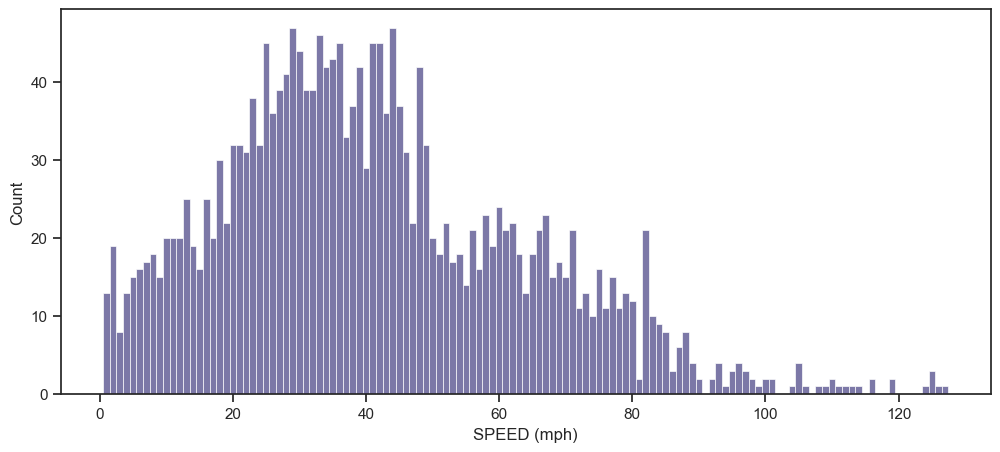

In [9]:
df_plot = df_data
g, ax = plt.subplots(figsize=(12, 5))
 

sns.histplot(
    data=df_plot,
    x="SPEED (mph)",
    # bins=12,
    color="#251e6c",
    alpha=0.6,
    # hue="Rail Line",
    # multiple="stack",
    discrete=True,
)

c:\Users\DavidRoberts\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


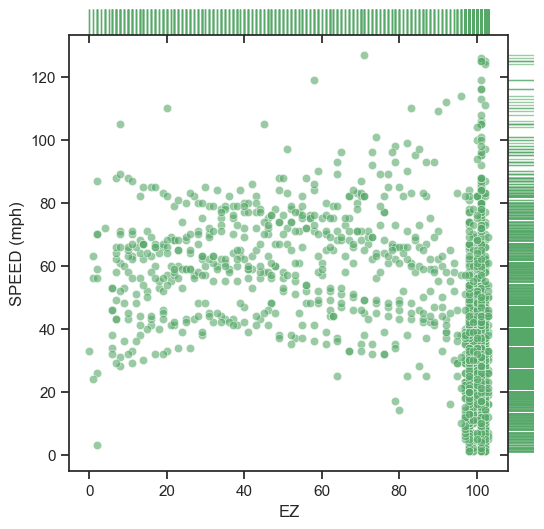

In [10]:
df_plot

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df_plot, x="EZ", y="SPEED (mph)", space=0, ratio=17)
g.plot_joint(sns.scatterplot,  sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)